In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
pd.set_option('display.max_colwidth', None)

sns.set(style="whitegrid")
sns.set_context("poster", font_scale=.5, rc={"grid.linewidth": 0.6})
sns.set_style({'font.family': 'Roboto'})
# jupyter-book clean ./ --all
# jupyter-book build ./
# ghp-import -n -p -f _build/html

# 1. Preliminary Data Analysis

Performing a preliminary data analysis is crucial to gaining a better understanding of the data and making necessary cleaning adjustments. During this step, we will explore the following questions:

1. Does the packname follow a consistent pattern?
2. What is the distribution of hold times?
3. Is there a clear relationship between difficulty rating and piece counts?

We'll be taking a look at the data sets member_hold_times_and_packs.tsv and packs.tsv.

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1 Members Data

- `memberID` - Unique identifiers for each person
- `holdtime` - number of days the person had the pack
- `puzzlepack` - name of the pack (may have more than 1 puzzle per pack)


In [5]:
member_holdtime_df = pd.read_csv('data/member_hold_times_and_packs_Feb16_2023.tsv', sep='\t', header=None)
member_holdtime_df.columns = ['memberID', 'holdtime', 'puzzlepack']
member_holdtime_df.shape

(19733, 3)

In [6]:
## Does packname have a pattern?
member_holdtime_df.head()

,memberID,holdtime,puzzlepack
0,member1,2.939411,Artifact Puzzles Justin Hillgrove Word Travels South Artifact Puzzles Justin Hillgrove Word Travels West
1,member1,0.998885,DaVici Puzzles Full Moon Feast DaVici Puzzles World&#39;s Greatest Miracle
2,member1,10.865032,DaVici Puzzles Flying Frigate DaVici Puzzles Hobby Horse
3,member1,22.083971,Liberty Puzzles Haeckel Hummingbirds Nautilus Puzzles Mother Adams
4,member1,5.077603,DaVici Puzzles Diana Zimens City Of Cats


**Comments**:
- Observe the extra space at the end of "cats ". This shows it has this pack has only one puzzle.
- other strings have the word "Puzzles" twice while 'Diana Zimens City Of Cats ' has it only once. 
- Looks like the first word is a brand or something, then the word "puzzle" and the name of puzzle. For example -
    * DaVici, **Puzzles** Full Moon Feast DaVici **Puzzles** World&#39;s Greatest Miracle 
    * DaVici, **Puzzles** Flying Frigate DaVici **Puzzles** Hobby Horse
    * Liberty, **Puzzles** Haeckel Hummingbirds Nautilus **Puzzles** Mother Adams
    * DaVici, **Puzzles** Diana Zimens City Of Cats 


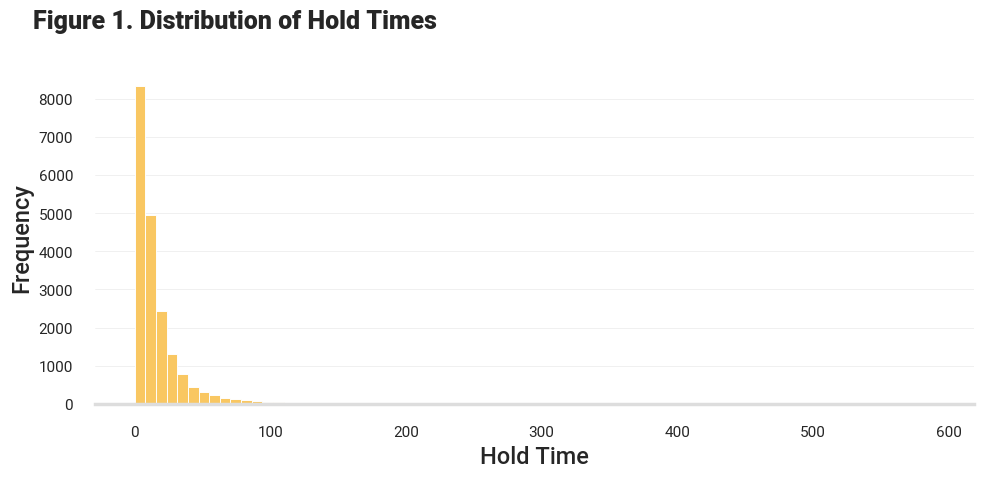

In [7]:
## What is the distribution for holdtimes?
plt.figure(figsize = (10,5))
plt.title("Figure 1. Distribution of Hold Times", weight='heavy',y =1.1, x=0.16).set_fontsize('18')
z = sns.histplot(data=member_holdtime_df, x="holdtime", color="#F9C762", alpha = 1.0, bins = 75)
sns.despine(left=True, bottom=False)
z.spines['bottom'].set_color('#DDDDDD')
z.yaxis.grid(True, color='#EEEEEE')
z.xaxis.grid(False)
plt.xlabel("Hold Time", size=17, weight=500)
plt.ylabel("Frequency", size=17, weight=500)
plt.tight_layout()
# plt.savefig("_static/images/hold_times_dist.png", format="png", dpi=1200)
plt.show()

![](_static/images/hold_times_dist.png)

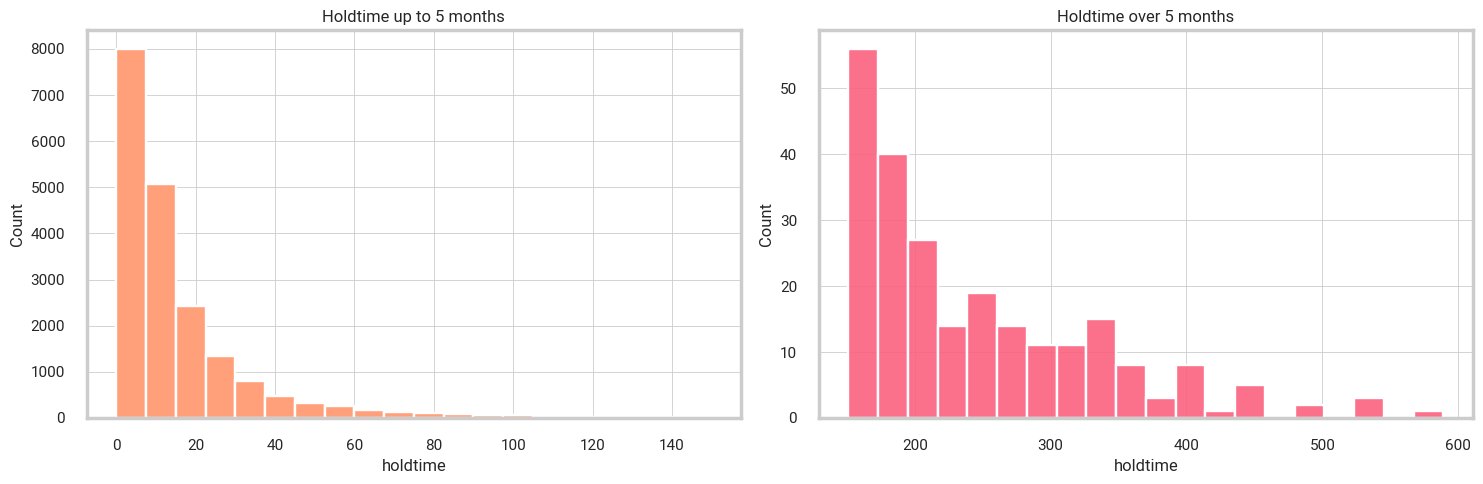

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=member_holdtime_df, x=member_holdtime_df.loc[member_holdtime_df['holdtime'] <= 150]['holdtime'], bins = 20,color="#ffa07a", alpha = 1.0, ax=axs[0])
axs[0].set_title("Holdtime up to 5 months")
sns.histplot(data=member_holdtime_df, x=member_holdtime_df.loc[member_holdtime_df['holdtime'] > 151]['holdtime'], bins = 20, color="#FB607F", alpha = 0.9, ax=axs[1])
axs[1].set_title("Holdtime over 5 months")
fig.tight_layout()
# plt.savefig("_static/images/hold_times_dist2.png", format="png", dpi=1200)
plt.show()

![](_static/images/hold_times_dist2.png)

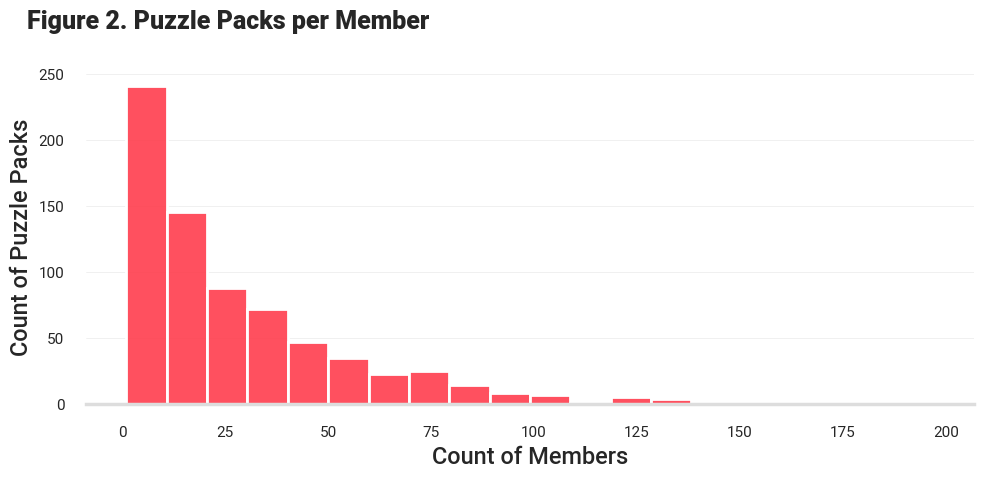

In [9]:
# Distribution of member hold times value counts
plt.figure(figsize = (10,5))
plt.title("Figure 2. Puzzle Packs per Member", weight='heavy',y =1.1, x=0.16).set_fontsize('18')
z=sns.histplot(data=member_holdtime_df['memberID'].value_counts().reset_index(name='freq'), x='freq', bins = 20, color="#FF3D4D", alpha = 0.9)
sns.despine(left=True, bottom=False)
z.spines['bottom'].set_color('#DDDDDD')
z.yaxis.grid(True, color='#EEEEEE')
z.xaxis.grid(False)
plt.xlabel("Count of Members", size=17, weight=500)
plt.ylabel("Count of Puzzle Packs", size=17, weight=500)
plt.tight_layout()
# plt.savefig("_static/images/members_dist2.png", format="png", dpi=1200)
plt.show()

![](_static/images/members_dist2.png)

### 1.2 Packs Data

* `pack_name` - name of the pack (may have more than 1 puzzle per pack)
* `brand` - brand name of puzzle pack
* `piece_count` - number of pieces in puzzle
* `difficulty_rating` - difficulty rating for puzzle

In [11]:
packs_df = pd.read_csv('data/packs_Feb16_2023.tsv', sep='\t', header=None)
packs_df.columns = ['pack_name', 'brand', 'piece_count', 'difficulty_rating']
packs_df.shape

(920, 4)

In [12]:
packs_df.head()

,pack_name,brand,piece_count,difficulty_rating
0,Anne Belle Thompson The Mikado Anne Belle Thompson Two Kimonos,Other-Hand-cut,"387,242","A-Easy,A-Easy"
1,Anthology Puzzles Alphonse Mucha La Plume Anthology Puzzles Fun at the Fair,NaN,"320,160","Average,Average"
2,Anthology Puzzles Colorful Cat Anthology Puzzles Life On The Reef,NaN,"150,170","Really-Hard,A-Easy"
3,Anthology Puzzles Framed American Gothic Anthology Puzzles Haeckel Floral,NaN,"320,300","Average,Average"
4,Anthology Puzzles Over The Moon Anthology Puzzles Happy House Plants,NaN,"278,177","Average,A-Easy"


Separate columns into `piece_count_1`, `piece_count_2`, `difficulty_rating_1`, `difficulty_rating_2`

In [13]:
# making two coulmns for piece count
packs_df['piece_count_1'] = packs_df['piece_count'].str.split(',', expand=True)[0]
packs_df['piece_count_2'] = packs_df['piece_count'].str.split(',', expand=True)[1]

# making two columns for difficulty
packs_df['difficulty_rating_1'] = packs_df['difficulty_rating'].str.split(',', expand=True)[0]
packs_df['difficulty_rating_2'] = packs_df['difficulty_rating'].str.split(',', expand=True)[1]

In [276]:
# creating temporary dataframe with no missing values for analysis
packs_df_temp_1 = packs_df.dropna(axis=0, subset = ['piece_count_1', 'difficulty_rating_1'])
packs_df_temp_2 = packs_df.dropna(axis=0, subset = ['piece_count_2', 'difficulty_rating_2'])
packs_df_temp_1.piece_count_1 = packs_df_temp_1.piece_count_1.astype('int')
packs_df_temp_2.piece_count_2 = packs_df_temp_2.piece_count_2.astype('int')

In [277]:
#print(packs_df.difficulty_rating.unique())
categories_dict = {}
for i in packs_df['difficulty_rating'].dropna():
    categ = i.rsplit(',')
    if categ[0] not in categories_dict:
        categories_dict[categ[0]] = 1
    else:
        categories_dict[categ[0]] += 1
    if categ[1] not in categories_dict:
        categories_dict[categ[1]] = 1
    else:
        categories_dict[categ[1]] += 1
 # Sort by value
categories_dict = dict(sorted(categories_dict.items(), key=lambda item: item[1]))
categdf = pd.DataFrame.from_dict(categories_dict, orient='index',columns=['Count'])
gmap = np.array([[4], [3], [2], [0]])
categdf.style.background_gradient(axis=None, gmap=gmap, cmap='spring',low=0.7999,high=0.8, vmin=0.05)

,Count
Really-Hard,79
Hard,329
A-Easy,493
Average,931


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


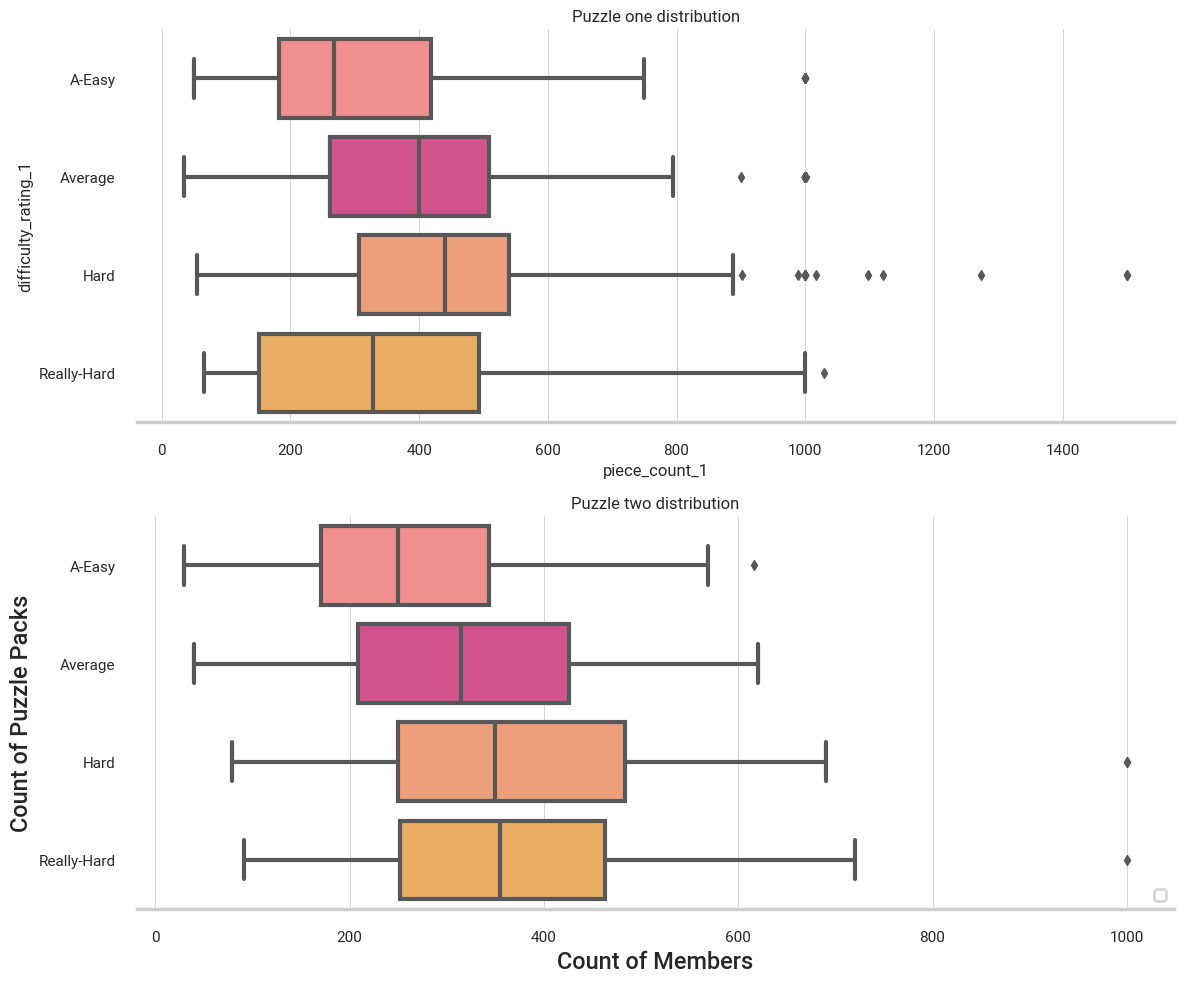

In [288]:
# checking category-wise distribution of piece_count
plt.figure(figsize = [12,10], dpi=100)
color_dict = {'A-Easy':"#ff7f80", 'Average':"#e83e8c", 'Hard':"#ff9867", 'Really-Hard': "#ffb14e"}

plt.subplot(2,1,1)
sns.boxplot(x = "piece_count_1", y= 'difficulty_rating_1', 
            data=packs_df_temp_1, palette = color_dict, order = ['A-Easy', 'Average', 'Hard', 'Really-Hard'])
plt.title("Puzzle one distribution")

plt.subplot(2,1,2)
sns.boxplot(x = "piece_count_2", y= 'difficulty_rating_2', 
            data=packs_df_temp_2, palette = color_dict, order = ['A-Easy', 'Average', 'Hard', 'Really-Hard'])

plt.title("Puzzle two distribution")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


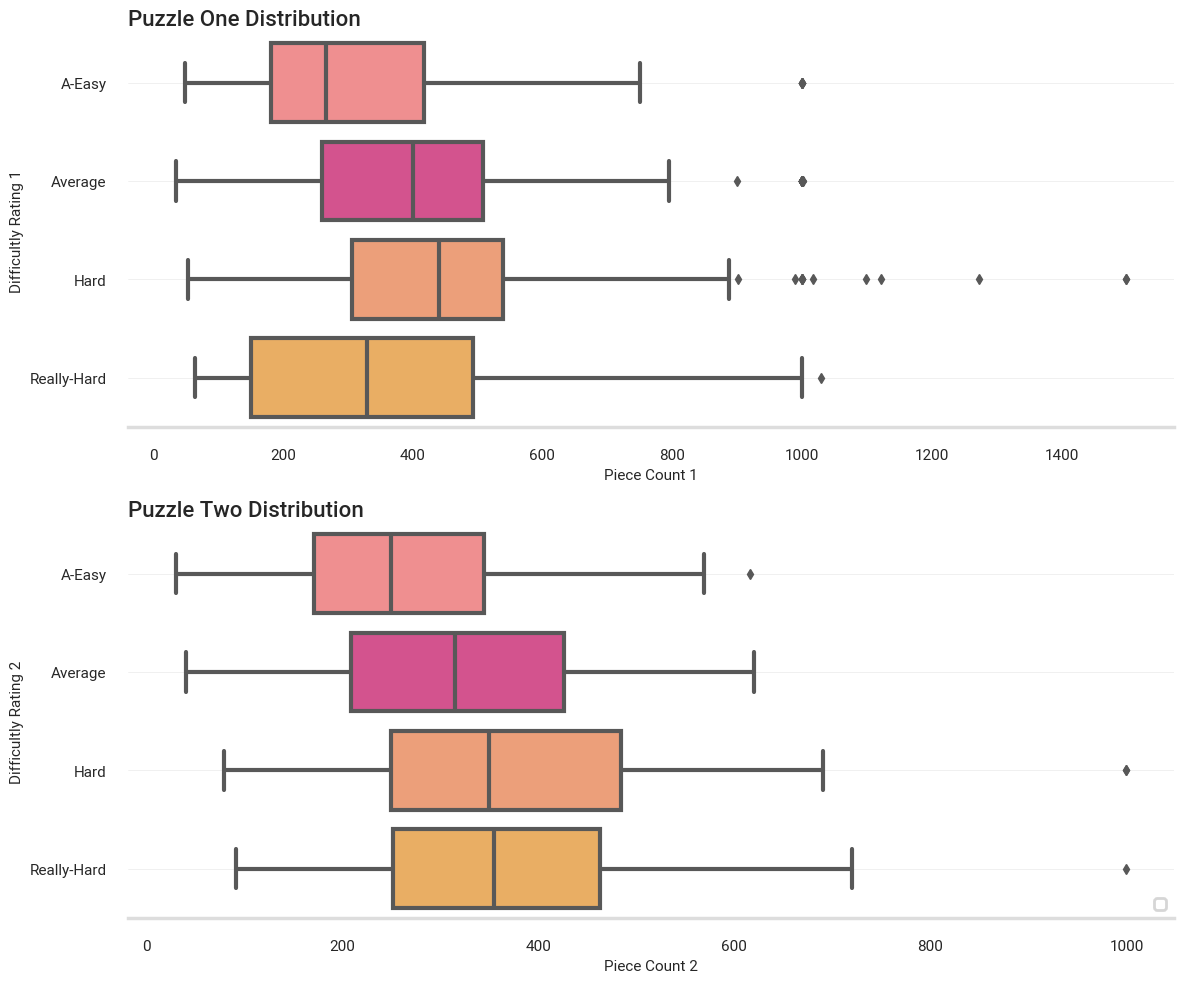

In [308]:
# checking category-wise distribution of piece_count
plt.figure(figsize = [12,10], dpi=100)
color_dict = {'A-Easy':"#ff7f80", 'Average':"#e83e8c", 'Hard':"#ff9867", 'Really-Hard': "#ffb14e"}

plt.subplot(2,1,1)
z1=sns.boxplot(x = "piece_count_1", y= 'difficulty_rating_1', 
            data=packs_df_temp_1, palette = color_dict, order = ['A-Easy', 'Average', 'Hard', 'Really-Hard'])
sns.despine(left=True, bottom=False)
z1.spines['bottom'].set_color('#DDDDDD')
z1.yaxis.grid(True, color='#EEEEEE')
z1.xaxis.grid(False)
plt.xlabel("Piece Count 1", size=11, weight=400)
plt.ylabel("Difficultly Rating 1", size=11)
plt.title("Puzzle One Distribution",size=16, weight=700,loc='left')

plt.subplot(2,1,2)
z2=sns.boxplot(x = "piece_count_2", y= 'difficulty_rating_2', 
            data=packs_df_temp_2, palette = color_dict, order = ['A-Easy', 'Average', 'Hard', 'Really-Hard'])
sns.despine(left=True, bottom=False)
z2.spines['bottom'].set_color('#DDDDDD')
z2.yaxis.grid(True, color='#EEEEEE')
z2.xaxis.grid(False)
plt.xlabel("Piece Count 2", size=11, weight=400)
plt.ylabel("Difficultly Rating 2", size=11)

plt.title("Puzzle Two Distribution",size=16, weight=700,loc='left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig("_static/images/pieces_category_dist.png", format="png", dpi=1200)
plt.show()




![](_static/images/pieces_category_dist.png)

In [47]:
packs_df.to_csv('data/packs_df.csv', index=False)
member_holdtime_df.to_csv('data/member_holdtime_df.csv', index=False)